<a href="https://colab.research.google.com/github/Denisganga/the_plant_doctor/blob/main/The_plant_doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#importing the required modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import torchvision.transforms as transforms
import torchvision.models as model
from PIL import Image

Mounted at /content/drive


In [2]:
from torchvision import datasets
from torch.utils.data import random_split
import numpy as np
import random

In [3]:
#unzipping my dataset
import zipfile

zip_file_path =  "/content/drive/My Drive/the_plant_doctor/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [17]:
# Define the data directory (the path where your unzipped dataset is located)
data_dir="/content/dataset"

In [4]:
#setup device agnostic code(using the GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
#define the transformations
data_transforms =transforms.Compose([
    #make the model more robust to differently oriented images.
    transforms.RandomRotation(degrees=15),

    #random cropping of images to create multiple views of the same image
    transforms.RandomCrop(size=(224,224), padding=10),

    #Apply random color transformations to the images to make the model more invariant to changes in lighting and color
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2,hue=0.2),

    #help the model focus on important features and reduce noise
    #transforms.GaussianBlur(kernel_size=3),

    #resize and crop the image to create variations in the field of view.
    transforms.RandomResizedCrop(size=(224,224), scale=(0.8, 1.0)),

    #introduce controlled occlusions or "erasing" of parts of the image during training
    #transforms.RandomErasing(),

    #Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),

    #Convert the image to a PyTorch tensor
    transforms.ToTensor(),

     # Normalize the image based on typical RGB mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])



])

In [18]:
#create a dataset using ImageFolder
dataset= datasets.ImageFolder(data_dir, transform=data_transforms)

In [19]:
# Define class labels based on the dataset structure
classes = dataset.classes

In [20]:
#splitting the dataset into training and testing sets
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset,[train_size, test_size])

In [21]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

41276
33020
8256


In [22]:

#see the first training sample
image, label = train_dataset[0]
image, label

(tensor([[[ 0.3652,  0.3652,  0.5878,  ..., -1.9124, -1.9124, -1.9124],
          [-0.2342, -0.6965, -0.3027,  ..., -1.9124, -1.9124, -1.9124],
          [ 0.1768, -0.3369,  0.1083,  ..., -1.9124, -1.9124, -1.9124],
          ...,
          [ 0.2453, -0.1999,  0.0227,  ..., -0.6109, -0.7822, -0.7993],
          [ 0.0912,  0.0741, -0.1828,  ..., -0.7650, -0.9877, -0.3541],
          [-0.0629, -0.2684, -0.3198,  ..., -0.4397, -0.6452, -0.3712]],
 
         [[ 0.3277,  0.3277,  0.5553,  ..., -1.8256, -1.8256, -1.8256],
          [-0.2850, -0.7577, -0.3550,  ..., -1.8256, -1.8256, -1.8256],
          [ 0.1352, -0.3901,  0.0651,  ..., -1.8256, -1.8256, -1.8256],
          ...,
          [ 0.1702, -0.3025, -0.0399,  ..., -0.6877, -0.8452, -0.8803],
          [ 0.0126, -0.0224, -0.2675,  ..., -0.8452, -1.0728, -0.4251],
          [-0.1275, -0.3375, -0.4076,  ..., -0.5126, -0.7227, -0.4251]],
 
         [[ 0.7751,  0.7751,  1.0017,  ..., -1.5953, -1.5953, -1.5953],
          [ 0.1476, -0.3055,

In [23]:
image.shape

torch.Size([3, 224, 224])

In [24]:
# See classes
class_names = dataset.classes

class_names

['PlantVillage', 'plantvillage']

In [25]:

#contents of plantvillages and PlantVillages directories
import os

# Define the paths to the "PlantVillage" and "plantvillage" directories
plant_village_path = os.path.join(data_dir, "PlantVillage")
plant_village_lower_path = os.path.join(data_dir, "plantvillage")

# List the subdirectories within "PlantVillage"
plant_village_classes = os.listdir(plant_village_path)

# List the subdirectories within "plantvillage"
plant_village_lower_classes = os.listdir(plant_village_lower_path)

print("Classes in 'PlantVillage':", plant_village_classes)
print("Classes in 'plantvillage':", plant_village_lower_classes)

Classes in 'PlantVillage': ['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Early_blight', 'Pepper__bell___Bacterial_spot', 'Potato___Late_blight', 'Potato___healthy', 'Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']
Classes in 'plantvillage': ['PlantVillage']


In [26]:
# Define the path to the "PlantVillage" directory
plant_village_dir = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
plant_village_subclasses = os.listdir(plant_village_dir)

# Print the class labels within "PlantVillage"
print("Subclasses in 'PlantVillage':", plant_village_subclasses)

Subclasses in 'PlantVillage': ['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Early_blight', 'Pepper__bell___Bacterial_spot', 'Potato___Late_blight', 'Potato___healthy', 'Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']


In [27]:
len(plant_village_classes)

15

In [36]:
#create a Dataloader for efficient dataloading and batch, turning datasets into batches
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#lets checkout what we have created
print(f"the data loaders are:{test_data_loader,train_data_loader}")
print(f"the length of train dataloader:{len(train_data_loader)} batches of {batch_size}")
print(f"the length of test dataloader:{len(test_data_loader)} batches of {batch_size}")

the data loaders are:(<torch.utils.data.dataloader.DataLoader object at 0x7cdc0dc0e140>, <torch.utils.data.dataloader.DataLoader object at 0x7cdc0dc0c820>)
the length of train dataloader:1032 batches of 32
the length of test dataloader:258 batches of 32


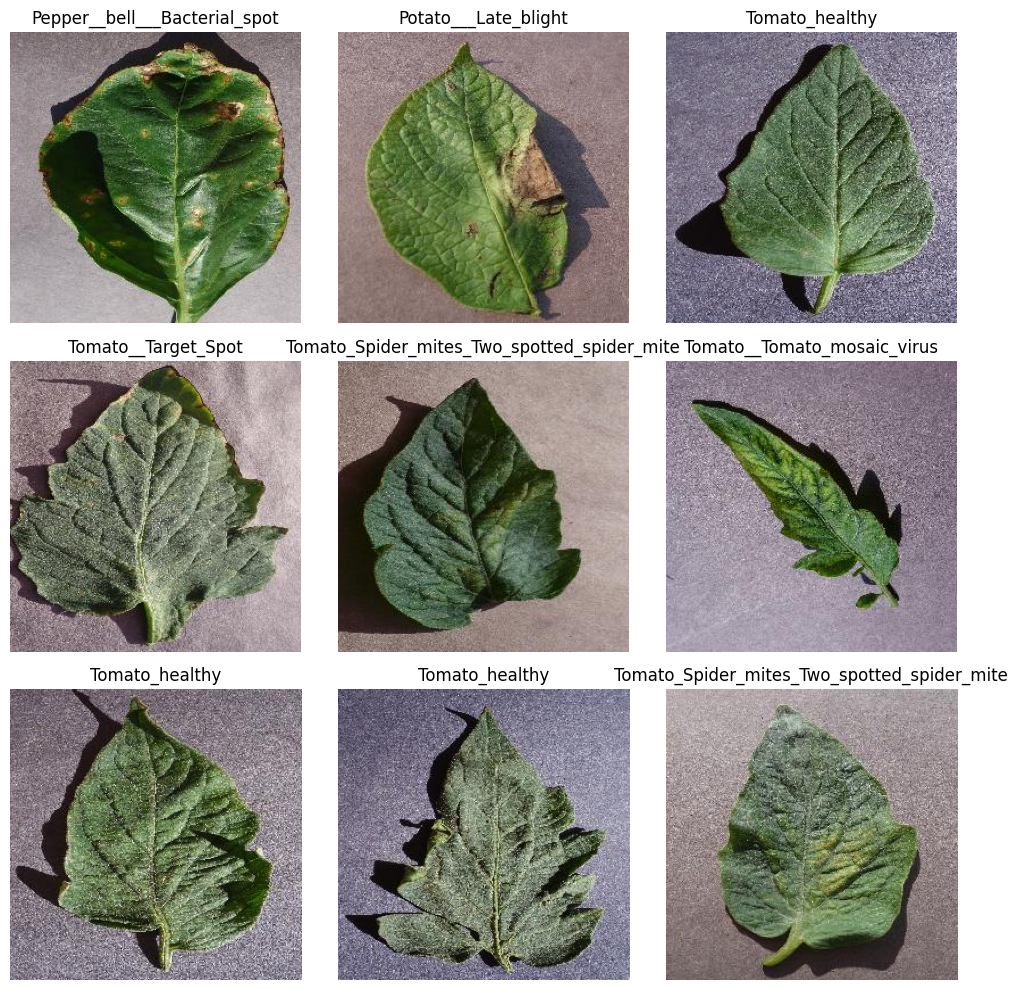

In [29]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the "PlantVillage" directory
plant_village_path = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
class_labels = os.listdir(plant_village_path)

# Create a 3x3 grid to display random images
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows * num_cols):
    # Randomly select a class label
    random_label = random.choice(class_labels)

    # Find a random image within the class directory
    class_dir = os.path.join(plant_village_path, random_label)
    image_files = os.listdir(class_dir)
    random_image_file = os.path.join(class_dir, random.choice(image_files))
    random_image = Image.open(random_image_file)

    # Plot the image
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(random_image)
    axes[row, col].set_title(random_label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


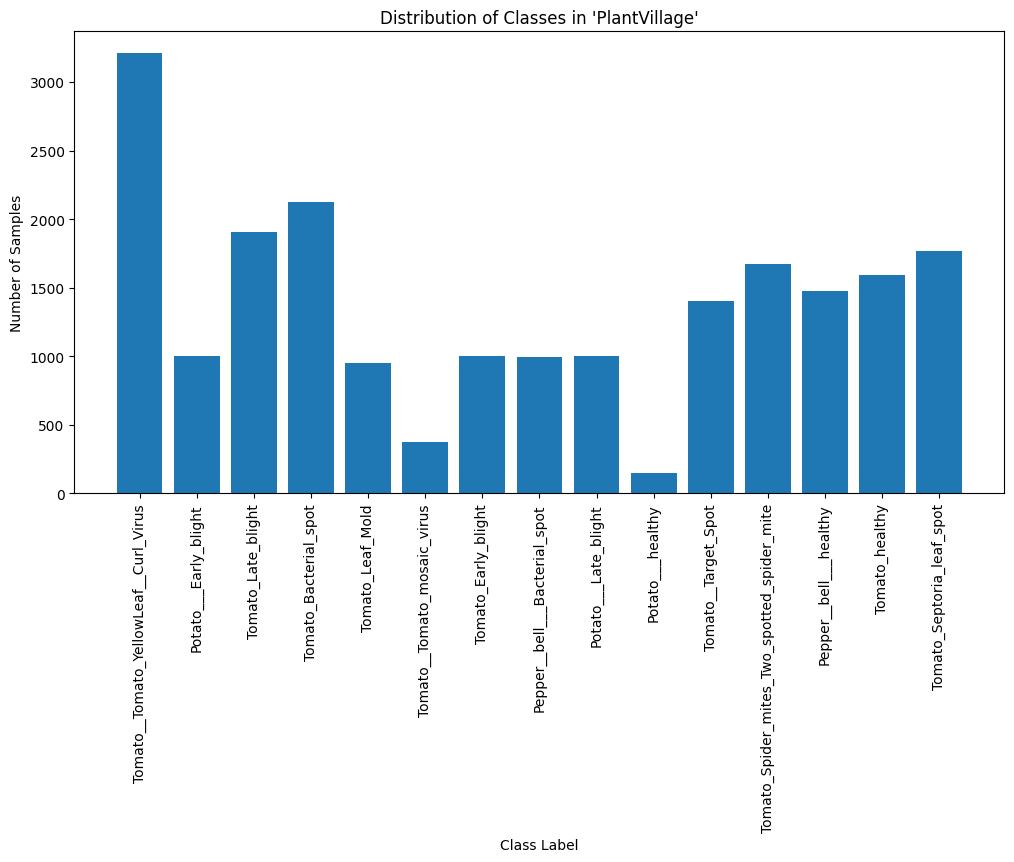

In [30]:

# Count the number of samples in each class
class_counts = [ len(os.listdir(os.path.join(plant_village_path, class_label))) for class_label in class_labels]

# Create a bar chart (histogram) to visualize the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.show()


In [31]:
#import the resnet18 pretrained model, and optimizer
import torch.optim as optim
from torchvision.models import resnet18
import torchvision.models as models

In [32]:
#Load the pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 101MB/s]


In [33]:
#freeze the pretrained layer
for param in model.parameters():
  param.requires_grad= False

In [34]:
# modifying the output layer for the specific task
num_classes = 15 #number of classes

#modify the final fully connected (fc) layer of ResNet-18 model to match the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

In [35]:
#set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.fc.parameters(),lr=0.001, momentum=0.9)#standard choices

In [41]:
#learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2,gamma=0.1)

In [38]:
#Define the EarlyStopping callback
class EarlyStopping:
  def __init__(self, patience=5,delta=0.01):
    self.patience = patience
    self.delta = delta
    self.counter = 0
    self.best_accuracy = None
    self.early_stop = False
  def __call__(self,current_accuracy):
    if self.best_accuracy is None:
      self.best_accuracy = current_accuracy
    elif current_accuracy < self.best_accuracy - self.delta:
      self.counter += 1
      if self.counter >= self.patience:
        self.early_stop = True

    else:
      self.best_accuracy
      self.counter = 0

    return self.early_stop




In [39]:
#set random seed for reproducibility
torch.manual_seed(0)

#initialize the EarlyStopping callback
early_stopping = EarlyStopping(patience=5, delta =0.01)

In [48]:
#Fine-tune the model
num_epochs=10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)#shift the model to GPU



for epoch in range(num_epochs):
  model.train()
  running_loss=0.0
  running_corrects = 0



  for inputs,labels in train_data_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
     #zero the optimizer gradients
    optimizer.zero_grad()

    #forward pass
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()

    #adjust learning rate
  scheduler.step

  print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_data_loader)}")

print("Finished fine-tuning")



Epoch 1, Loss: 0.7333618226901505
Epoch 2, Loss: 0.7171872479393501
Epoch 3, Loss: 0.720661464645419
Epoch 4, Loss: 0.7246250614754913
Epoch 5, Loss: 0.7203640623032584
Epoch 6, Loss: 0.7220185823565306
Epoch 7, Loss: 0.7213255202238874
Epoch 8, Loss: 0.7222957558525626
Epoch 9, Loss: 0.7205917157175005
Epoch 10, Loss: 0.7200731433523718
Finished fine-tuning


In [49]:
# lets save the model
torch.save(model.state_dict(), 'fine_tuned_resnet18.pth')

In [50]:
#mapping the class labels before making predictions
class_name_mapping ={
    0:"Pepper__bell__Bacteria",
    1:"Pepper__bell__healthy",
    2:"Potato___Early_blight",
    3:"Potato___Late_blight",
    4:"Potato___healthy",
    5:"Tomato_Bacterial_spot",
    6:"Tomato_Early_blight",
    7:"Tomato_Late_blight",
    8:"Tomato_Leaf_Mold",
    9:"Tomato_Septoria_leaf_spot_spot",
    10:"Tomato_Spider_mites_Two_spotted_spider_mite",
    11:"Tomato__Target_spot",
    12:"Tomato__Tomato_YellowLeaf__Curl_Virus_spot",
    13:"Tomato__Tomato_mosaic_virus_spot",
    14:"Tomato_healthy_spot"


}

In [51]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
print(model.fc)

Linear(in_features=512, out_features=15, bias=True)


In [53]:
#model evaluation
#initialize variables for evaluation
validation_loss=0.0
correct_predictions=0
total_samples=0

#use your test data loader for evaluation
with torch.no_grad():
  for inputs, labels in test_data_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs =model(inputs)
    loss = criterion(outputs,labels)
    validation_loss += loss.item()

    _, predicted = torch.max(outputs,  1)
    total_samples  +=labels.size(0)
    correct_predictions += (predicted == labels).sum().item()

#calculate the accuracy
accuracy= correct_predictions / total_samples

# Print validation loss and accuracy
print(f"Validation Loss: {validation_loss / len(test_data_loader)}")
print(f"Accuracy on Test Data: {100 * accuracy:.2f}%")

Validation Loss: 0.7031820836917374
Accuracy on Test Data: 50.05%
